In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.optimizers import *
from sklearn.decomposition import PCA
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, validation_curve, GridSearchCV, ShuffleSplit, learning_curve
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import joblib

In [11]:
df = pd.read_csv('C:/Users/norma/Desktop/BITIRME/(Mcisiz)GSE_OrtakData_NormR.csv', sep = ";", decimal=",")
print(df.shape)
df = df[df.Class != 2]
df.shape

(1262, 11619)


(949, 11619)

In [12]:
features = df.drop('Class',axis=1)
labels_dr = 'C:/Users/norma/Desktop/BITIRME/gse_less_feature.csv'
labels_df = pd.read_csv(labels_dr, sep = ',')
labels = labels_df.iloc[:949,:2]

In [13]:
n_components = 225
pca = PCA(n_components = n_components).fit(features)
principalComponents = pca.fit_transform(features)
columns = ['Pc' + str(i) for i in range(1,n_components+1)]
principalDf = pd.DataFrame(data = principalComponents
             , columns = columns)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(principalDf, labels, test_size= 0.25, random_state=42)

In [ ]:
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(RandomForestClassifier(), hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(x_train, y_train)

In [ ]:
# print best parameter after tuning
print(bestF.best_params_)

print('\n')

# print how our model looks after hyper-parameter tuning
print(bestF.best_estimator_)

In [ ]:
criterion = ['gini', 'entropy']
max_features = ['sqrt', 'log2', None]

hyperF = dict(criterion=criterion, max_features=max_features)

gridF = GridSearchCV(RandomForestClassifier(max_depth=30, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=300), hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(x_train, y_train)

In [ ]:
# print best parameter after tuning
print(bestF.best_params_)

print('\n')

# print how our model looks after hyper-parameter tuning
print(bestF.best_estimator_)

In [ ]:
grid_predictions = bestF.predict(x_test)

# print classification report
print(classification_report(y_test, grid_predictions))

In [22]:
class_d = 'C:/Users/norma/Desktop/BITIRME/duzgun_GSE_OrtakData_NormR.csv'
class_df = pd.read_csv(class_d, sep = ';', decimal = ',')
class_df = class_df[class_df.Class != 2]

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

encoder_df = pd.DataFrame(encoder.fit_transform(class_df[['Class']]).toarray())
encoder_df.columns = ['AD','CTL']

y_test_ = encoder.inverse_transform(y_test).ravel()

# Best Random Forest Model

In [16]:
clf = RandomForestClassifier(max_depth=30, min_samples_leaf=5, min_samples_split=5, criterion = 'gini', max_features = 'sqrt',
                       n_estimators=300)

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

y_pred_ = np.argmax(y_pred, axis=1)

# Load Model

In [19]:
rf = joblib.load('random_forest2class.pkl')

# Confusion Matrix

Classification report : 
               precision    recall  f1-score   support

           0       0.65      0.72      0.68       119
           1       0.69      0.61      0.64       119

    accuracy                           0.66       238
   macro avg       0.67      0.66      0.66       238
weighted avg       0.67      0.66      0.66       238



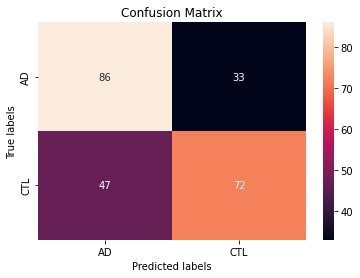

In [17]:
# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test_, y_pred_, labels=[0,1])
print('Classification report : \n',matrix)

labels_ = ['AD','CTL']
ax= plt.subplot()

# confusion matrix
matrix = confusion_matrix(
    y_test_, y_pred_)

sns.heatmap(matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels_);

# AUC-ROC

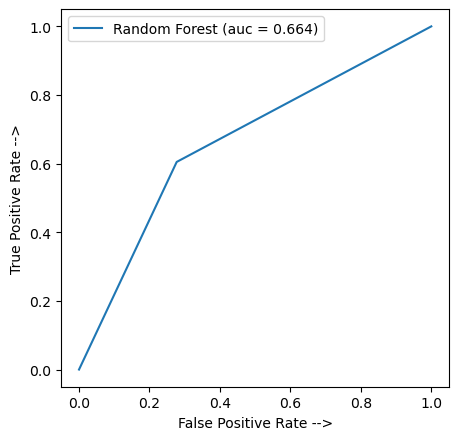

In [23]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(y_test_, y_pred[:,1])
auc_rf = auc(fpr,tpr)

plt.figure(figsize=(5,5), dpi=100)
plt.plot(fpr, tpr, linestyle = '-', label = 'Random Forest (auc = %0.3f)' % auc_rf)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()

# Save Model

In [18]:
# Save the model as a pickle in a file
joblib.dump(clf, 'random_forest2class.pkl')

['random_forest2class.pkl']